In [115]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
from geopandas import GeoDataFrame, read_file,GeoSeries
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import gaussian_kde
import contextily as ctx
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [82]:
lsoa_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp")
lsoa_shp = lsoa_shp.to_crs(epsg=27700)

ward_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Ward.shp")
ward_shp = ward_shp.to_crs(epsg=27700)

borough_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
borough_shp = borough_shp.to_crs(epsg=27700)

msoa_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp")
msoa_shp = msoa_shp.to_crs(epsg=27700)

In [83]:
census_lsoa = pd.read_csv('data/census_lsoa_2021.csv')


In [84]:
census_old = pd.read_csv('data/msoa_census_data_old.csv')

In [85]:
census_lsoa.rename(columns={'LSOA code': 'LSOA11CD'}, inplace=True)
census_lsoa = census_lsoa.merge(lsoa_shp[['LSOA11CD', 'MSOA11CD']], on='LSOA11CD', how='left')
census_lsoa

,LSOA11CD,local authority code,local authority name,Household number,"Occupation_Managers, directors and senior officials",Occupation_Professional occupations,Occupation_Associate professional and technical occupations,Occupation_Adminis-trative and secretarial occupations,Occupation_Skilled trades occupations,"Occupation_Caring, leisure and other service occupations",...,Unemployed,cars_none,cars_one,cars_two_or_more,No religion,One or more religions,Same ethnic group,Different ethnic group,Other multiple ethnic groups,MSOA11CD
0,E01000001,E09000001,City of London,835,0.223502,0.467742,0.211982,0.044931,0.005760,0.021889,...,0.025811,0.659880,0.292216,0.047904,0.218527,0.125891,0.349225,0.174017,0.034565,E02000001
1,E01000002,E09000001,City of London,823,0.249143,0.473143,0.213714,0.040000,0.003429,0.005714,...,0.024596,0.703524,0.247874,0.048603,0.217497,0.126367,0.334143,0.142163,0.024301,E02000001
2,E01000003,E09000001,City of London,1013,0.190619,0.387226,0.216567,0.071856,0.027944,0.026946,...,0.045213,0.814413,0.165844,0.019743,0.185039,0.086614,0.254438,0.137081,0.034517,E02000001
3,E01000005,E09000001,City of London,479,0.105263,0.261134,0.123482,0.087045,0.042510,0.105263,...,0.061203,0.782881,0.192067,0.025052,0.100000,0.089583,0.336798,0.130977,0.079002,E02000001
4,E01032739,E09000001,City of London,876,0.213682,0.456081,0.182432,0.040541,0.019426,0.031250,...,0.029107,0.834475,0.130137,0.035388,0.165148,0.167426,0.284738,0.153759,0.079727,E02000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,E09000033,Westminster,733,0.328294,0.242981,0.262419,0.041037,0.011879,0.044276,...,0.010874,0.504775,0.361528,0.133697,0.080933,0.145405,0.379076,0.177989,0.070652,NaN
4990,E01035719,E09000033,Westminster,634,0.247059,0.339706,0.172059,0.069118,0.014706,0.070588,...,0.042727,0.676656,0.283912,0.039432,0.147385,0.118859,0.355906,0.159055,0.062992,NaN
4991,E01035720,E09000033,Westminster,585,0.189069,0.296898,0.147710,0.096012,0.025111,0.060561,...,0.037523,0.639316,0.309402,0.051282,0.131175,0.149915,0.389456,0.156463,0.056122,NaN
4992,E01035721,E09000033,Westminster,1303,0.228281,0.264325,0.177449,0.062847,0.032348,0.093346,...,0.052268,0.691481,0.256332,0.052187,0.075630,0.103896,0.288668,0.100306,0.039051,NaN


In [86]:
columns_to_aggregate = census_lsoa.columns[3:28]
columns_to_aggregate

Index(['Household number',
       'Occupation_Managers, directors and senior officials',
       'Occupation_Professional occupations',
       'Occupation_Associate professional and technical occupations',
       'Occupation_Adminis-trative and secretarial occupations',
       'Occupation_Skilled trades occupations',
       'Occupation_Caring, leisure and other service occupations',
       'Occupation_Sales and customer service occupations',
       'Occupation_Process, plant and machine operatives',
       'Occupation_Elementary occupations', 'Less than 5km',
       '5km to less than 10km', '10km and over', 'Works mainly from home',
       'Full-time student', 'Work full-time', 'Unemployed', 'cars_none',
       'cars_one', 'cars_two_or_more', 'No religion', 'One or more religions',
       'Same ethnic group', 'Different ethnic group',
       'Other multiple ethnic groups'],
      dtype='object')

In [87]:
census_msoa = census_lsoa.groupby('MSOA11CD')[columns_to_aggregate].mean().reset_index()
census_msoa

,MSOA11CD,Household number,"Occupation_Managers, directors and senior officials",Occupation_Professional occupations,Occupation_Associate professional and technical occupations,Occupation_Adminis-trative and secretarial occupations,Occupation_Skilled trades occupations,"Occupation_Caring, leisure and other service occupations",Occupation_Sales and customer service occupations,"Occupation_Process, plant and machine operatives",...,Work full-time,Unemployed,cars_none,cars_one,cars_two_or_more,No religion,One or more religions,Same ethnic group,Different ethnic group,Other multiple ethnic groups
0,E02000001,817.333333,0.199467,0.424578,0.186999,0.053297,0.019730,0.034526,0.025540,0.011584,...,0.825387,0.036449,0.770722,0.194895,0.034384,0.177158,0.119268,0.302411,0.146538,0.047334
1,E02000002,721.500000,0.084190,0.166457,0.094877,0.090944,0.128928,0.115118,0.077961,0.092229,...,0.662678,0.046229,0.317801,0.440880,0.241319,0.126095,0.109928,0.569826,0.118965,0.055427
2,E02000003,655.333333,0.097809,0.174783,0.103976,0.109653,0.110515,0.098762,0.082107,0.081450,...,0.673592,0.043207,0.287772,0.467365,0.244864,0.076122,0.114382,0.571567,0.118037,0.065413
3,E02000004,576.750000,0.083898,0.196312,0.111843,0.109179,0.126529,0.097117,0.069298,0.089160,...,0.728549,0.041938,0.238069,0.425475,0.336456,0.140291,0.146821,0.612910,0.103858,0.050672
4,E02000005,655.750000,0.081513,0.134722,0.101921,0.091622,0.116688,0.121998,0.097732,0.104311,...,0.671873,0.040542,0.305753,0.455697,0.238550,0.149239,0.121621,0.624646,0.112887,0.055763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,641.500000,0.165808,0.319444,0.166305,0.071387,0.061974,0.069723,0.045077,0.034555,...,0.743540,0.031999,0.316093,0.475970,0.207937,0.203150,0.156265,0.458728,0.186144,0.043030
979,E02006928,917.000000,0.158990,0.351436,0.197358,0.059381,0.031886,0.063750,0.043037,0.027568,...,0.797975,0.036537,0.549605,0.387615,0.062780,0.223041,0.182990,0.425985,0.179954,0.077064
980,E02006929,598.000000,0.148696,0.304789,0.168542,0.078366,0.055660,0.068870,0.062646,0.025042,...,0.776827,0.040250,0.582186,0.360935,0.056880,0.197652,0.208038,0.449784,0.193408,0.096055
981,E02006930,801.666667,0.163592,0.322560,0.194146,0.062167,0.057871,0.058112,0.060192,0.023653,...,0.772014,0.043845,0.462664,0.448628,0.088708,0.253411,0.200769,0.425461,0.187228,0.112657


In [88]:
census_old.rename(columns={'Middle Super Output Area': 'MSOA11CD'}, inplace=True)


In [89]:
# remove the last row
census_old = census_old.iloc[:-1]
census_old_selected = census_old[['MSOA11CD','Age-youth','Age-middle-age','Age-elder','Age-working age',
                     'Population','House Prices',
                     'Total Median Annual Household Income']]

In [90]:
# merge the two dataframes
census_msoa = census_msoa.merge(census_old_selected, on='MSOA11CD', how='left')
census_msoa

,MSOA11CD,Household number,"Occupation_Managers, directors and senior officials",Occupation_Professional occupations,Occupation_Associate professional and technical occupations,Occupation_Adminis-trative and secretarial occupations,Occupation_Skilled trades occupations,"Occupation_Caring, leisure and other service occupations",Occupation_Sales and customer service occupations,"Occupation_Process, plant and machine operatives",...,Same ethnic group,Different ethnic group,Other multiple ethnic groups,Age-youth,Age-middle-age,Age-elder,Age-working age,Population,House Prices,Total Median Annual Household Income
0,E02000001,817.333333,0.199467,0.424578,0.186999,0.053297,0.019730,0.034526,0.025540,0.011584,...,0.302411,0.146538,0.047334,0.587119,0.272542,0.140339,0.775593,26.2,485000,46788
1,E02000002,721.500000,0.084190,0.166457,0.094877,0.090944,0.128928,0.115118,0.077961,0.092229,...,0.569826,0.118965,0.055427,0.651808,0.185683,0.162509,0.579041,31.7,182250,27059
2,E02000003,655.333333,0.097809,0.174783,0.103976,0.109653,0.110515,0.098762,0.082107,0.081450,...,0.571567,0.118037,0.065413,0.647685,0.224888,0.127427,0.648880,47.7,205500,36835
3,E02000004,576.750000,0.083898,0.196312,0.111843,0.109179,0.126529,0.097117,0.069298,0.089160,...,0.612910,0.103858,0.050672,0.586703,0.249596,0.163701,0.642834,25.3,205000,39668
4,E02000005,655.750000,0.081513,0.134722,0.101921,0.091622,0.116688,0.121998,0.097732,0.104311,...,0.624646,0.112887,0.055763,0.675893,0.213618,0.110488,0.632562,72.9,167000,29156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,641.500000,0.165808,0.319444,0.166305,0.071387,0.061974,0.069723,0.045077,0.034555,...,0.458728,0.186144,0.043030,0.607336,0.236560,0.156103,0.633554,32.5,283750,38143
979,E02006928,917.000000,0.158990,0.351436,0.197358,0.059381,0.031886,0.063750,0.043037,0.027568,...,0.425985,0.179954,0.077064,0.836126,0.126686,0.037188,0.792671,144.4,264600,33988
980,E02006929,598.000000,0.148696,0.304789,0.168542,0.078366,0.055660,0.068870,0.062646,0.025042,...,0.449784,0.193408,0.096055,0.757543,0.159680,0.082777,0.732443,31.3,308750,35028
981,E02006930,801.666667,0.163592,0.322560,0.194146,0.062167,0.057871,0.058112,0.060192,0.023653,...,0.425461,0.187228,0.112657,0.735101,0.181680,0.083219,0.765280,77.7,371000,46180


In [91]:
census_msoa.columns

Index(['MSOA11CD', 'Household number',
       'Occupation_Managers, directors and senior officials',
       'Occupation_Professional occupations',
       'Occupation_Associate professional and technical occupations',
       'Occupation_Adminis-trative and secretarial occupations',
       'Occupation_Skilled trades occupations',
       'Occupation_Caring, leisure and other service occupations',
       'Occupation_Sales and customer service occupations',
       'Occupation_Process, plant and machine operatives',
       'Occupation_Elementary occupations', 'Less than 5km',
       '5km to less than 10km', '10km and over', 'Works mainly from home',
       'Full-time student', 'Work full-time', 'Unemployed', 'cars_none',
       'cars_one', 'cars_two_or_more', 'No religion', 'One or more religions',
       'Same ethnic group', 'Different ethnic group',
       'Other multiple ethnic groups', 'Age-youth', 'Age-middle-age',
       'Age-elder', 'Age-working age', 'Population', 'House Prices',
   

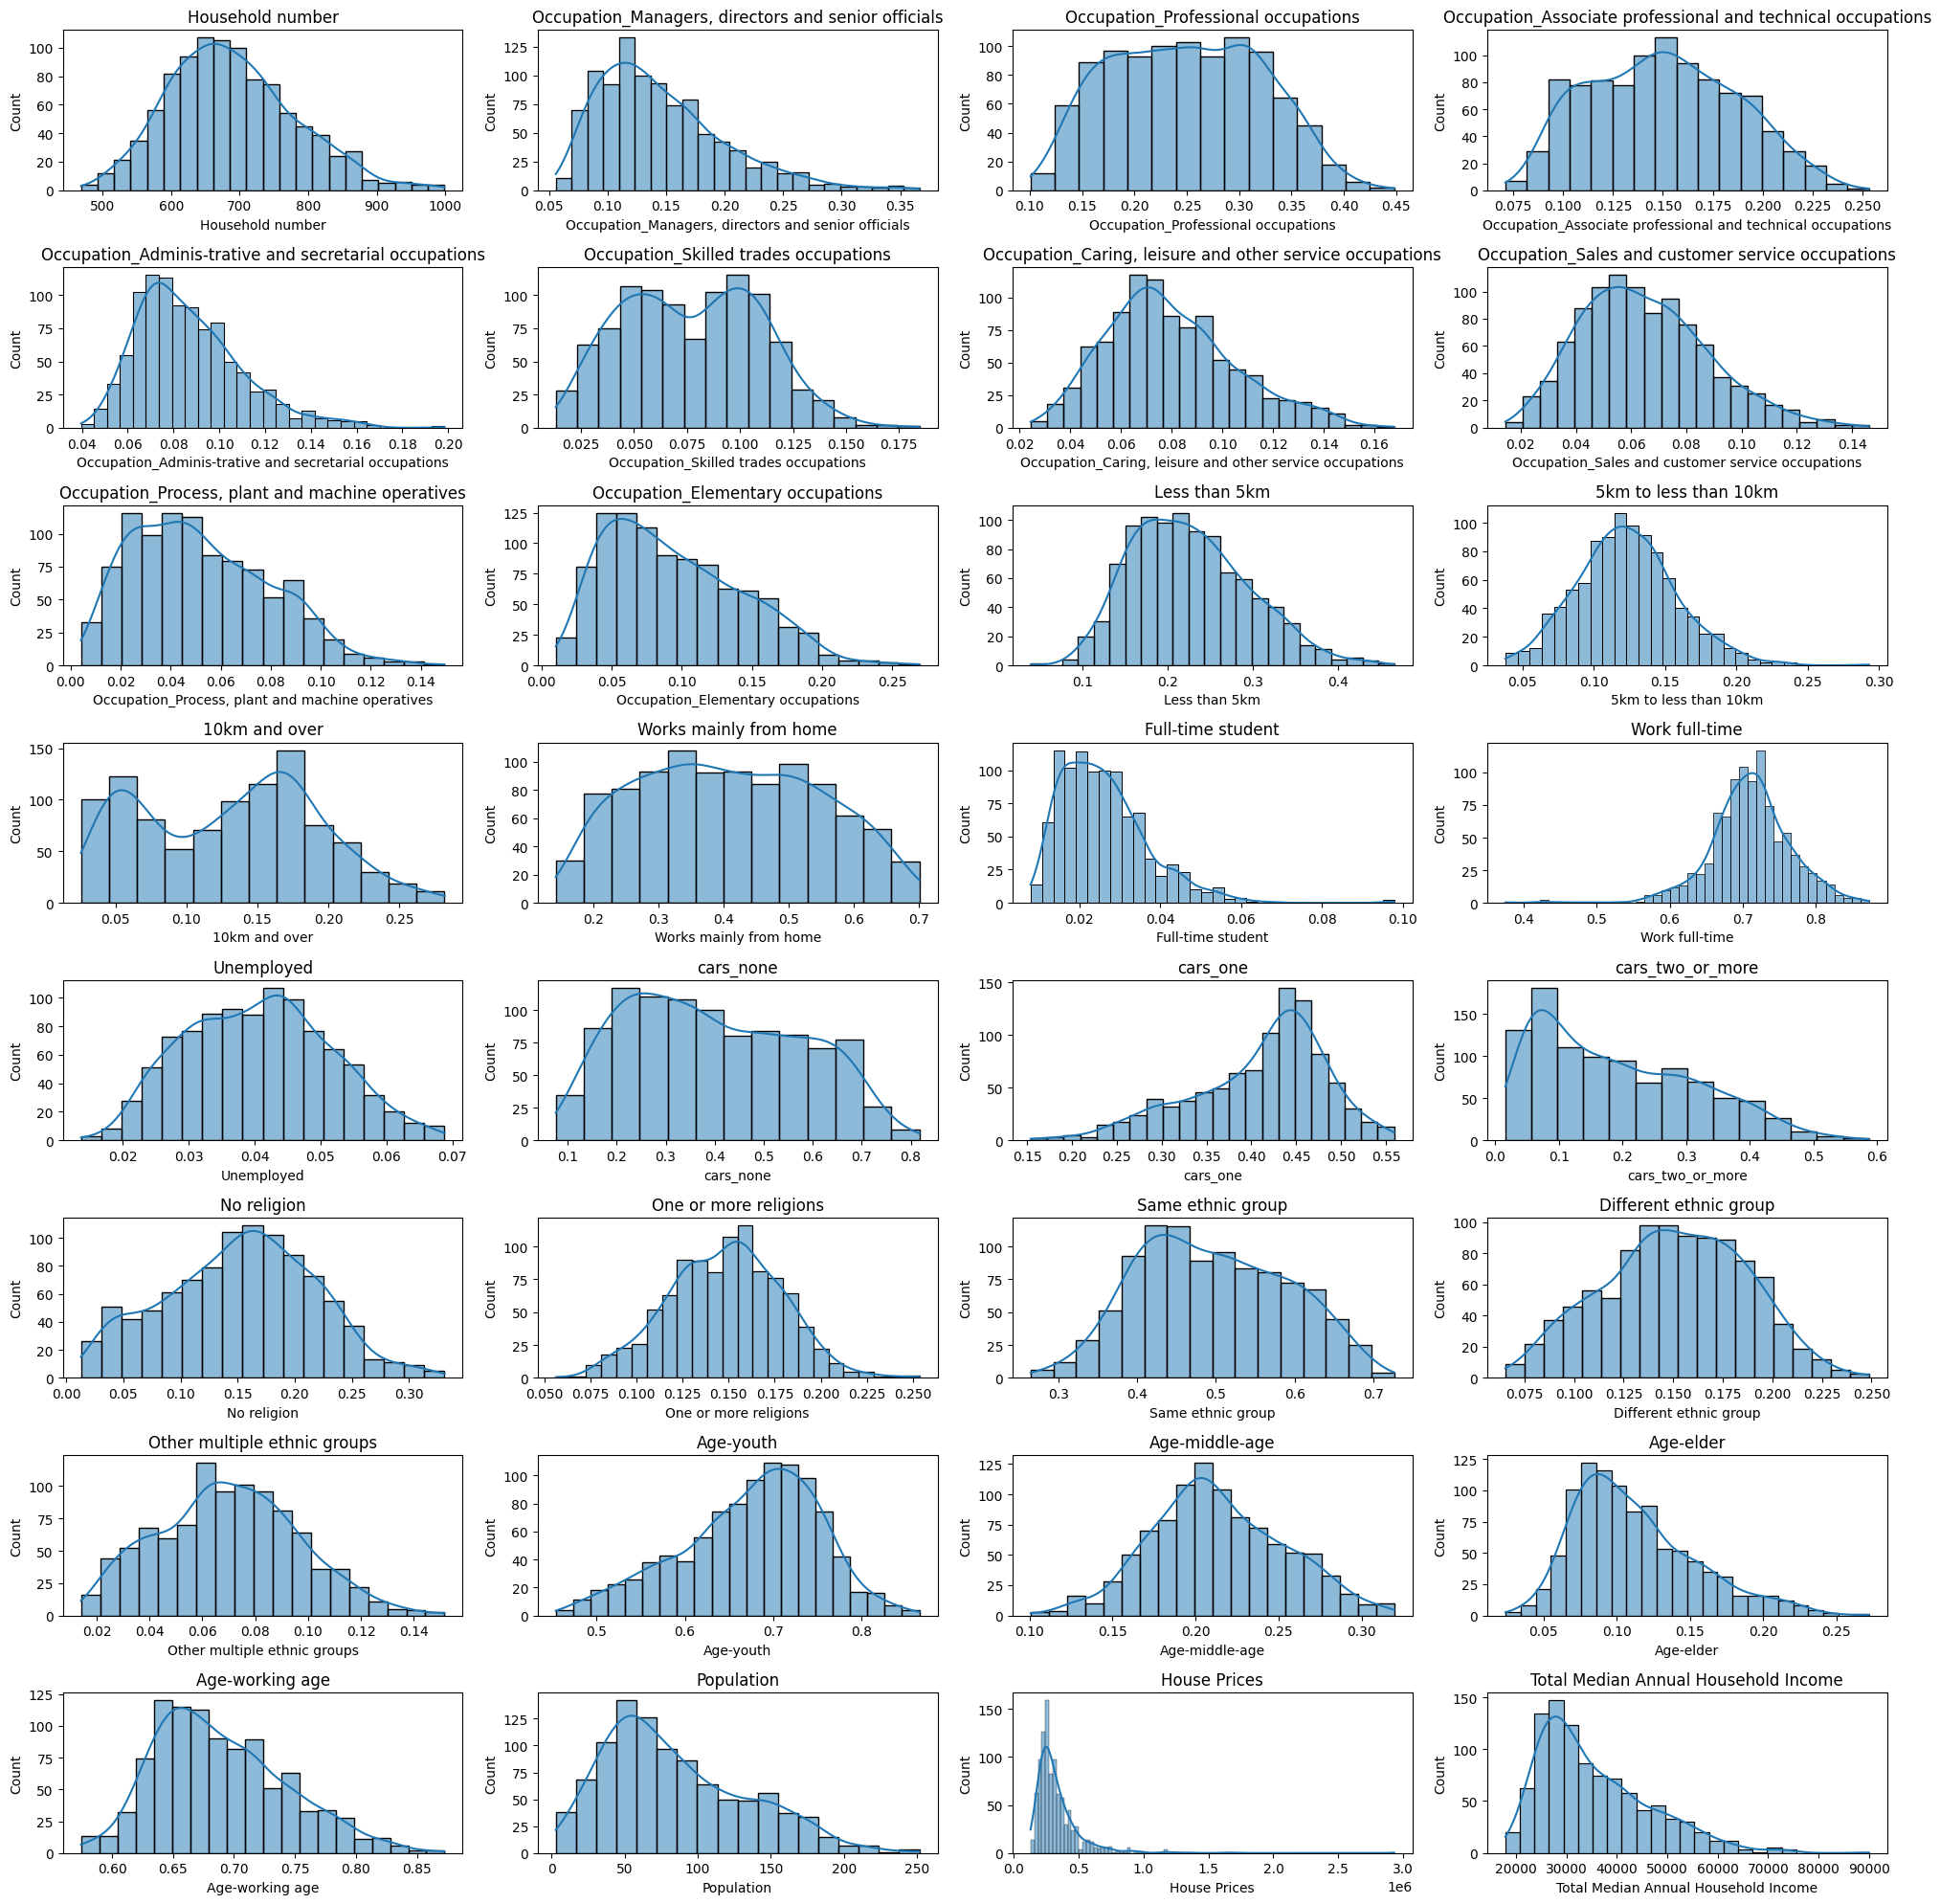

In [92]:
# plot the distribution of all columns in the census_msoa
fig, ax = plt.subplots(8, 4, figsize=(20, 20))
for i, col in enumerate(census_msoa.columns[1:]):
    sns.histplot(census_msoa[col],kde=True,ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

In [93]:
# log the House Prices
census_msoa['House Prices'] = np.log(census_msoa['House Prices'])

In [95]:
census_msoa.to_csv('data/msoa_census_data_new.csv', index=False)

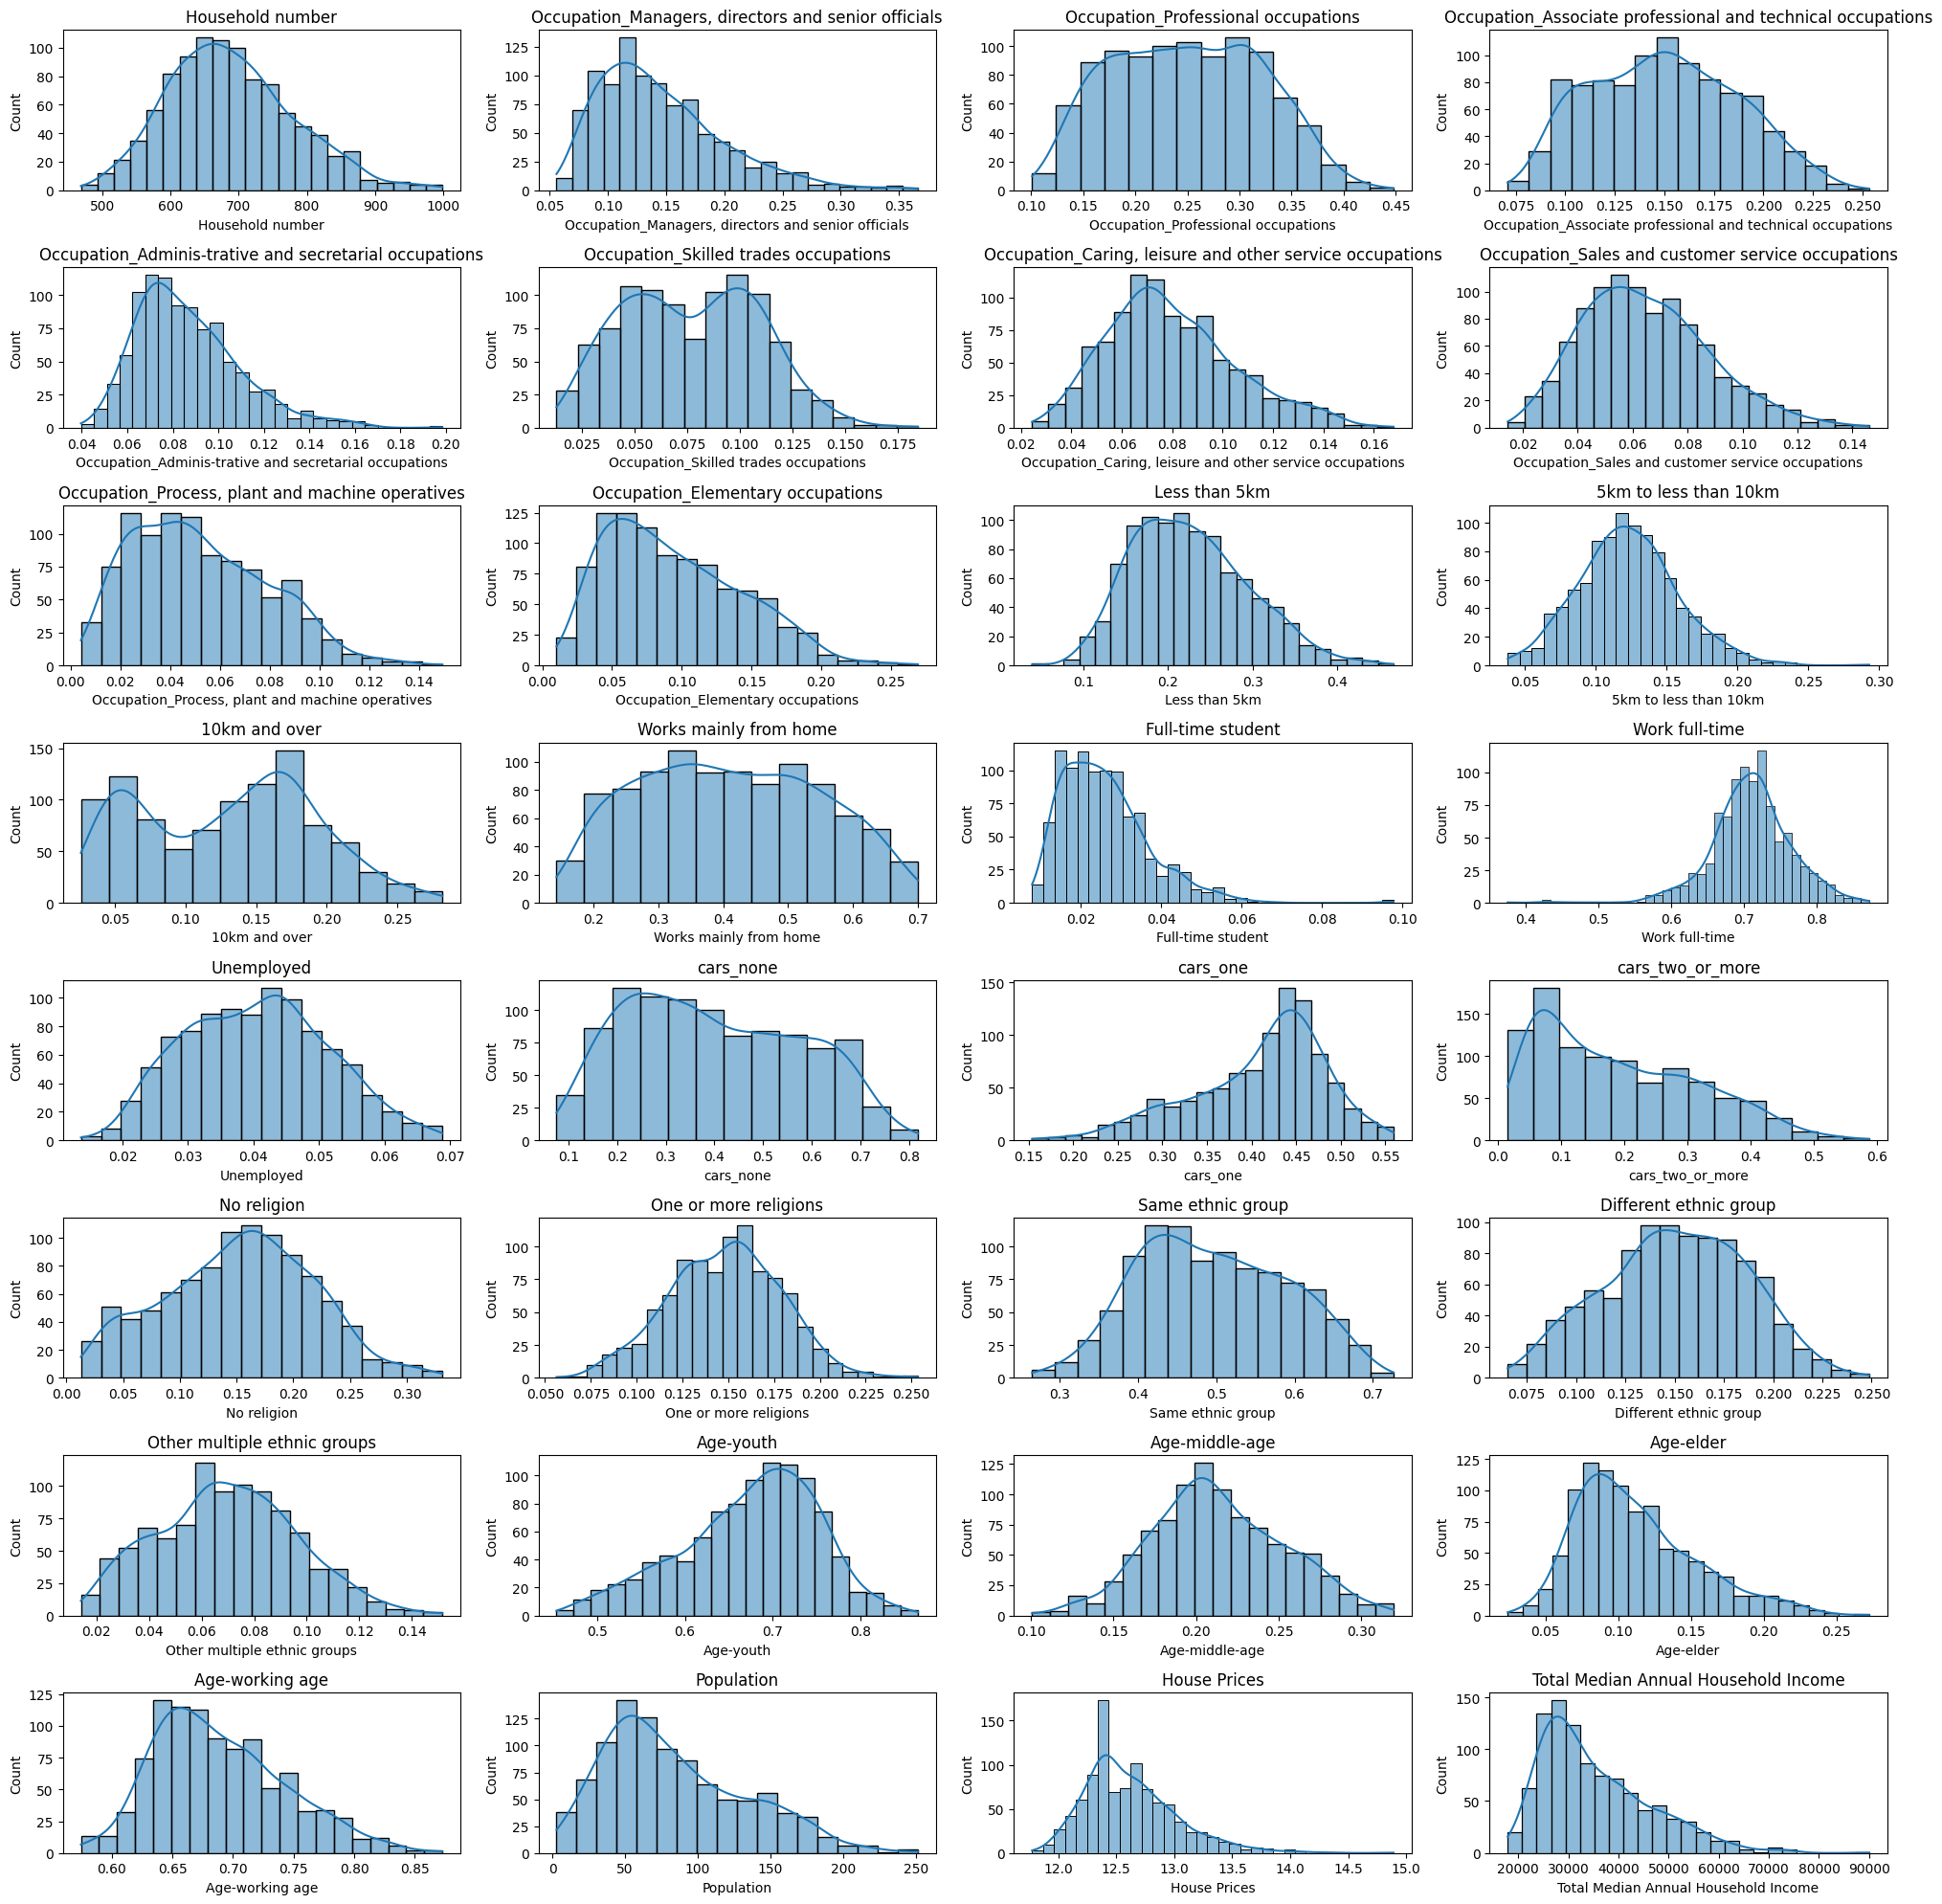

In [97]:
fig, ax = plt.subplots(8, 4, figsize=(20, 20))
for i, col in enumerate(census_msoa.columns[1:]):
    sns.histplot(census_msoa[col],kde=True,ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(col)
plt.tight_layout()
plt.savefig('output/census_msoa.png')
plt.show()

In [98]:
# remove the MSOA11CD	 column
census_msoa = census_msoa.iloc[:,1:]
census_msoa

,Household number,"Occupation_Managers, directors and senior officials",Occupation_Professional occupations,Occupation_Associate professional and technical occupations,Occupation_Adminis-trative and secretarial occupations,Occupation_Skilled trades occupations,"Occupation_Caring, leisure and other service occupations",Occupation_Sales and customer service occupations,"Occupation_Process, plant and machine operatives",Occupation_Elementary occupations,...,Same ethnic group,Different ethnic group,Other multiple ethnic groups,Age-youth,Age-middle-age,Age-elder,Age-working age,Population,House Prices,Total Median Annual Household Income
0,817.333333,0.199467,0.424578,0.186999,0.053297,0.019730,0.034526,0.025540,0.011584,0.044277,...,0.302411,0.146538,0.047334,0.587119,0.272542,0.140339,0.775593,26.2,13.091904,46788
1,721.500000,0.084190,0.166457,0.094877,0.090944,0.128928,0.115118,0.077961,0.092229,0.149295,...,0.569826,0.118965,0.055427,0.651808,0.185683,0.162509,0.579041,31.7,12.113135,27059
2,655.333333,0.097809,0.174783,0.103976,0.109653,0.110515,0.098762,0.082107,0.081450,0.140946,...,0.571567,0.118037,0.065413,0.647685,0.224888,0.127427,0.648880,47.7,12.233201,36835
3,576.750000,0.083898,0.196312,0.111843,0.109179,0.126529,0.097117,0.069298,0.089160,0.116665,...,0.612910,0.103858,0.050672,0.586703,0.249596,0.163701,0.642834,25.3,12.230765,39668
4,655.750000,0.081513,0.134722,0.101921,0.091622,0.116688,0.121998,0.097732,0.104311,0.149494,...,0.624646,0.112887,0.055763,0.675893,0.213618,0.110488,0.632562,72.9,12.025749,29156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,641.500000,0.165808,0.319444,0.166305,0.071387,0.061974,0.069723,0.045077,0.034555,0.065728,...,0.458728,0.186144,0.043030,0.607336,0.236560,0.156103,0.633554,32.5,12.555849,38143
979,917.000000,0.158990,0.351436,0.197358,0.059381,0.031886,0.063750,0.043037,0.027568,0.066594,...,0.425985,0.179954,0.077064,0.836126,0.126686,0.037188,0.792671,144.4,12.485975,33988
980,598.000000,0.148696,0.304789,0.168542,0.078366,0.055660,0.068870,0.062646,0.025042,0.087389,...,0.449784,0.193408,0.096055,0.757543,0.159680,0.082777,0.732443,31.3,12.640287,35028
981,801.666667,0.163592,0.322560,0.194146,0.062167,0.057871,0.058112,0.060192,0.023653,0.057707,...,0.425461,0.187228,0.112657,0.735101,0.181680,0.083219,0.765280,77.7,12.823957,46180


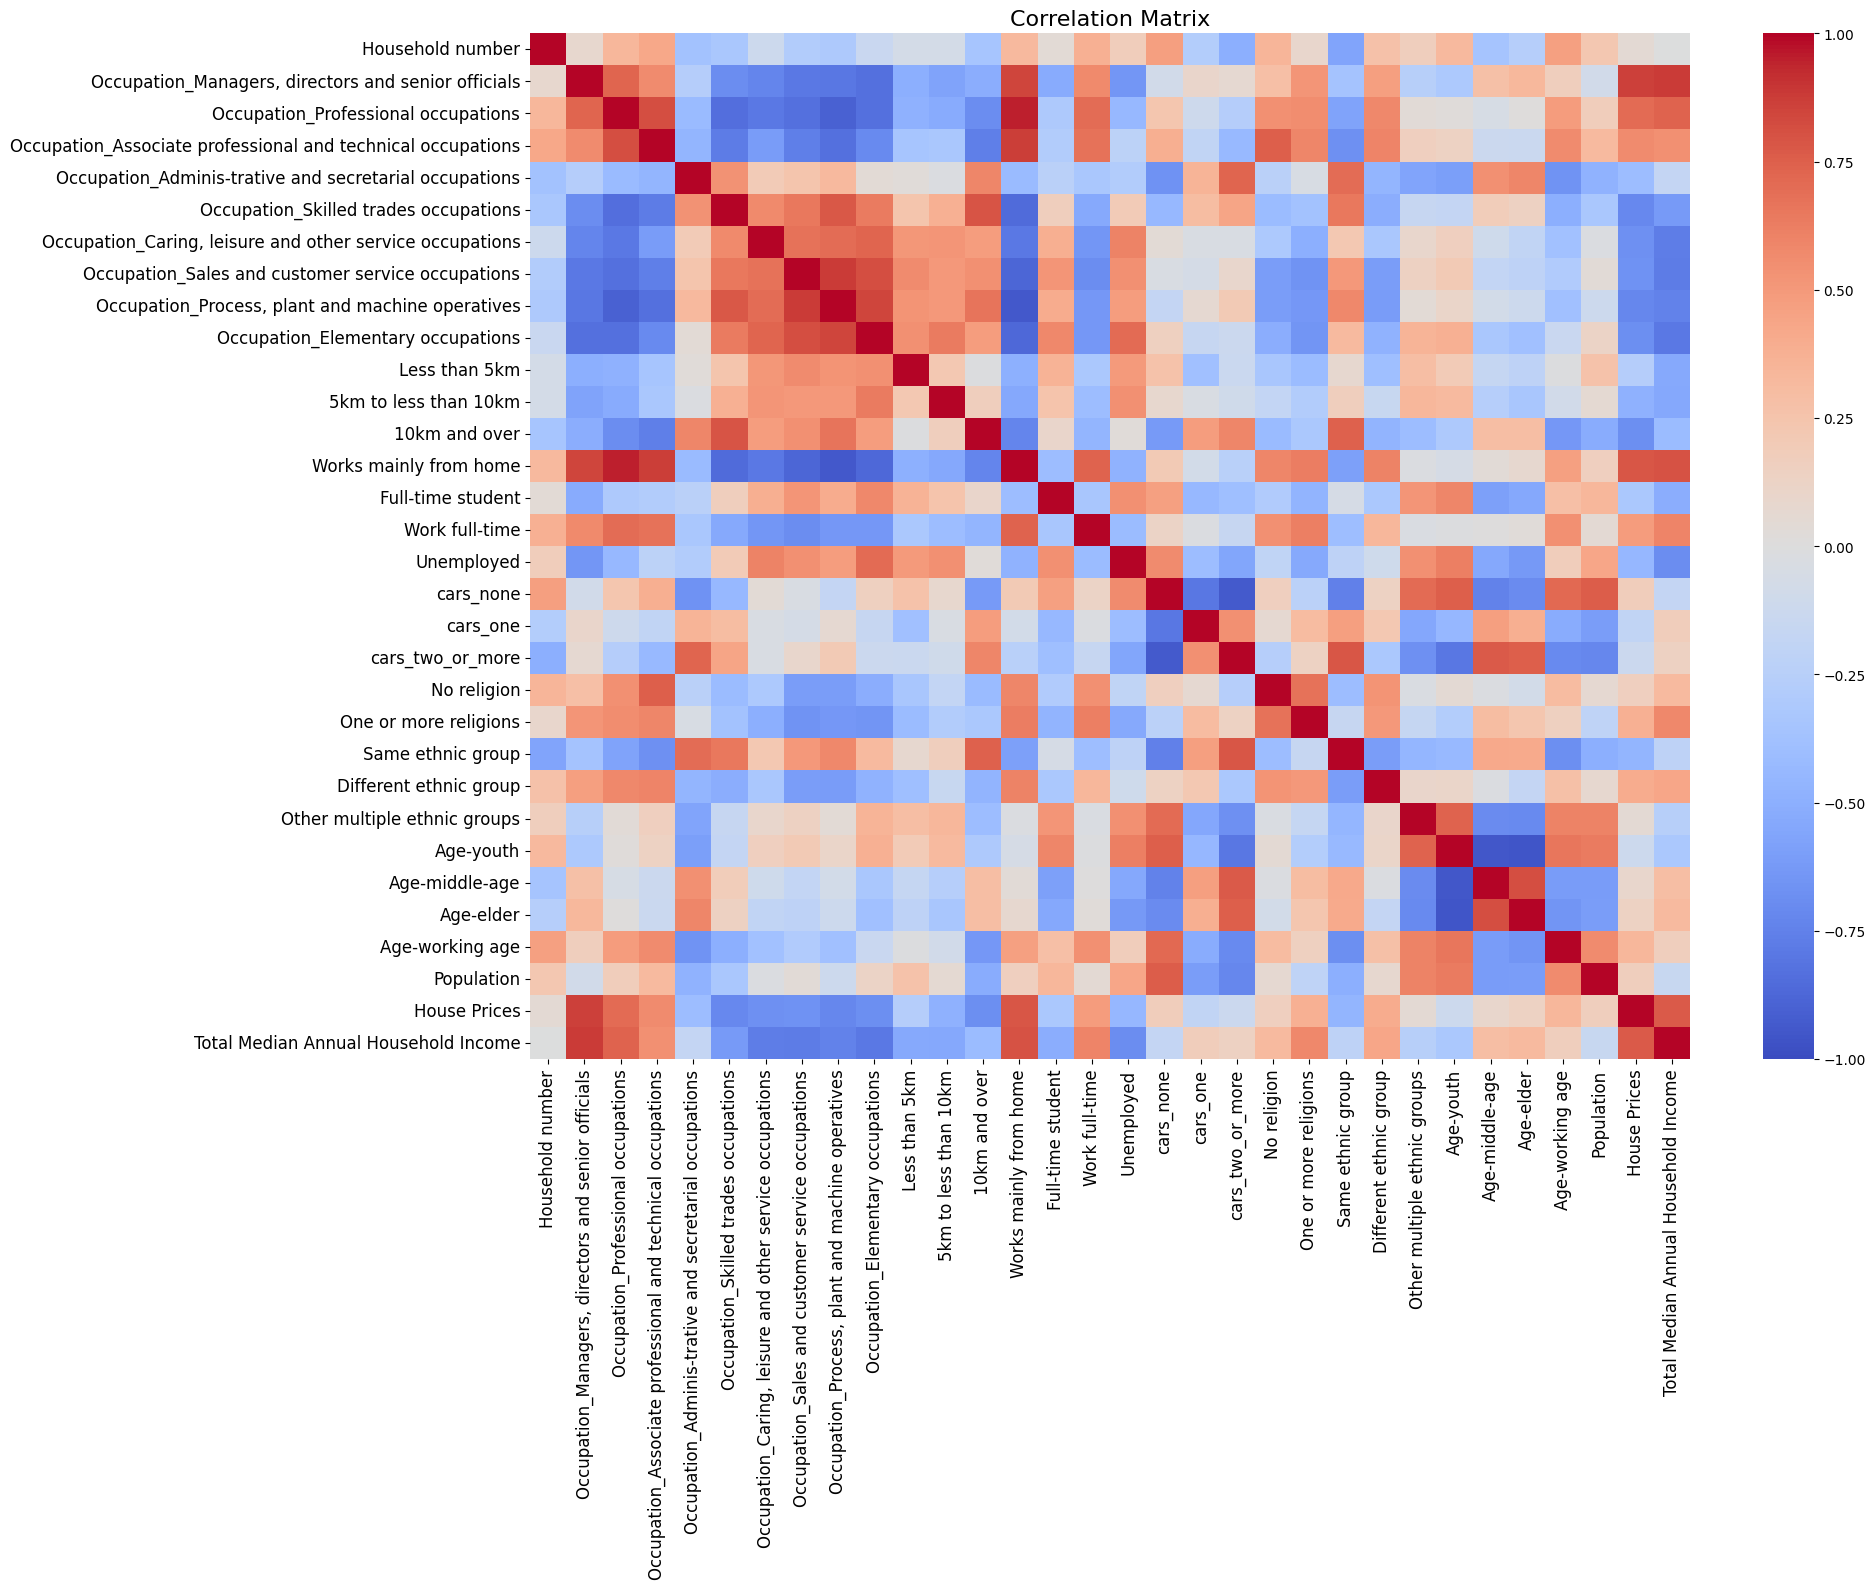

In [114]:
numeric_columns = census_msoa.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = census_msoa[numeric_columns].corr()

# Create a figure and axis
plt.figure(figsize=(20, 16))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
# Set the title
plt.title('Correlation Matrix', fontsize=16)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('output/correlation_matrix.png', dpi=800, bbox_inches='tight')


In [117]:


# Print data info for debugging
print("Data info:")
print(census_msoa.info())

# Select only numeric columns and remove any non-numeric columns
numeric_columns = census_msoa.select_dtypes(include=['float64', 'int64']).columns
X = census_msoa[numeric_columns]

# Print selected columns for debugging
print("\nSelected numeric columns:")
print(X.columns)

# Check for NaN values
print("\nNaN values in each column:")
print(X.isna().sum())

# Remove rows with NaN values
X = X.dropna()

# Print shape after removing NaN values
print("\nShape after removing NaN values:", X.shape)

# Make sure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Remove any remaining non-numeric data
X = X.select_dtypes(include=['float64', 'int64'])

# Print final shape
print("\nFinal shape:", X.shape)

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Correlation Matrix
plt.figure(figsize=(24, 20))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of MSOA Census Data', fontsize=20)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('correlation_matrix_large_font.png', dpi=300, bbox_inches='tight')
plt.close()

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Proportion of Variance Explained', fontsize=12)
plt.title('Scree Plot', fontsize=16)
plt.tight_layout()
#plt.savefig('pca_scree_plot.png', dpi=300)
plt.close()

# PCA biplot
n_components = 2
pca_2d = PCA(n_components=n_components)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.7)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})', fontsize=12)
plt.title('PCA Biplot', fontsize=16)

for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, pca_2d.components_[0, i], pca_2d.components_[1, i], color='r', alpha=0.5)
    plt.text(pca_2d.components_[0, i] * 1.2, pca_2d.components_[1, i] * 1.2, feature, color='r', ha='center', va='center')

plt.tight_layout()
plt.savefig('pca_biplot.png', dpi=300)
plt.close()

# K-means clustering
n_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
try:
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Visualize clusters on PCA plot
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})', fontsize=12)
    plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})', fontsize=12)
    plt.title('K-means Clustering on PCA Components', fontsize=16)
    plt.tight_layout()
    #plt.savefig('kmeans_clustering.png', dpi=300)
    plt.close()
except Exception as e:
    print(f"Error during K-means clustering: {str(e)}")

print("Analysis complete. Output files: correlation_matrix_large_font.png, pca_scree_plot.png, pca_biplot.png, kmeans_clustering.png")

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 32 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Household number                                             983 non-null    float64
 1   Occupation_Managers, directors and senior officials          983 non-null    float64
 2   Occupation_Professional occupations                          983 non-null    float64
 3   Occupation_Associate professional and technical occupations  983 non-null    float64
 4   Occupation_Adminis-trative and secretarial occupations       983 non-null    float64
 5   Occupation_Skilled trades occupations                        983 non-null    float64
 6   Occupation_Caring, leisure and other service occupations     983 non-null    float64
 7   Occupation_Sales and customer service occupations            983 non-